In [76]:
%run init.ipynb

# Tomografia de estados quânticos

Para mais detalhes, veja https://qiskit.org/documentation/tutorials/noise/8_tomography.html.

Usaremos funções prontas do qiskit para realizar tomografia de estados quânticos (TEQ). No entanto, lembre de como essas tomografias são feitas na prática. Vale observar que essas funções implementam métodos que garantem a positividade da matriz densidade obtida.

In [77]:
# como sempre, importa tudo do qiskit
from qiskit import *

In [78]:
# importa também funcoes para determinar os circuitos a serem tomografados e pra ajustar os dados
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter

### Cria o circuito

In [81]:
# cria os circuitos, sem medidas
qr = QuantumRegister(1); qc = qiskit.QuantumCircuit(qr); 

In [82]:
# cria o circuito
qc.h(qr[0]);

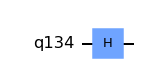

In [83]:
# visualiza o circuito
qc.draw(output='mpl')

### Determina de qual circuito quântico fazer TEQ

In [84]:
# Determina de qual circuito e de qual qubit fazer TEQ
qstc = state_tomography_circuits(qc, qr[0])

In [85]:
# No. de medidas pra estimar cada dist. de probabilidade
nshots = 8192

### Testando no simulador

In [86]:
# testa/executa no simulador
job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots)

In [87]:
# 'ajusta' os resultados conforme o esperado do circuit qst
qstf = StateTomographyFitter(job.result(), qstc)

In [88]:
# extrai o operador densidade tomografado
rho = qstf.fit(method='lstsq')

In [89]:
# note que o que retorna é um array do numpy
rho

array([[0.50451627+0.j        , 0.49996338+0.00402803j],
       [0.49996338-0.00402803j, 0.49548373+0.j        ]])

In [90]:
# grafica a parte real de um estado de um qubit
def plot_rho1qb(rho):
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm
    result = [rho[0,0], rho[0,1], rho[1,0], rho[1,1]]
    result = np.array(result, dtype=float)
    fig = plt.figure(figsize=(5, 5), dpi=100)
    ax1 = fig.add_subplot(111, projection='3d')
    xlabels = np.array([r'$|0\rangle$', r'$|1\rangle$']); xpos = np.arange(xlabels.shape[0])
    ylabels = np.array([r'$|1\rangle$', r'$|0\rangle$']); ypos = np.arange(ylabels.shape[0])
    xposM, yposM = np.meshgrid(xpos, ypos, copy=False); zpos = result
    dx = 0.5; dy = 0.5; dz = zpos
    ax1.set_xlim(0, 1.5); ax1.set_ylim(0, 1.5); ax1.set_zlim(-1, 1)
    ax1.w_xaxis.set_ticks(xpos + dx/2.0); ax1.w_xaxis.set_ticklabels(xlabels)
    ax1.w_yaxis.set_ticks(ypos + dy/2.0); ax1.w_yaxis.set_ticklabels(ylabels)
    values = np.linspace(0.2, 1.0, xposM.ravel().shape[0]); colors = cm.rainbow(values)
    ax1.bar3d(xposM.ravel(), yposM.ravel(), dz*0, dx, dy, dz, color=colors)
    plt.show()

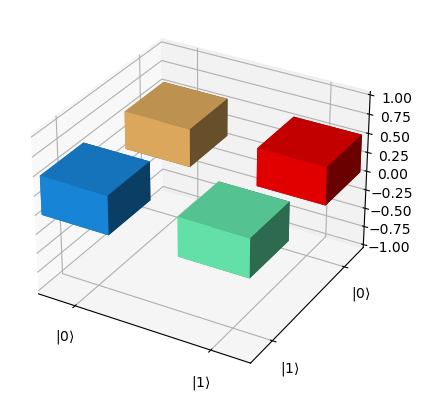

In [91]:
plot_rho1qb(rho.real)

In [92]:
plot_rho1qb(rho.imag)

## Rodando o circuit no chip 


In [ ]:
# carrega minha conta no IBMQ (o ID foi incluido no outro arquivo, nao precisa incluir aqui)
qiskit.IBMQ.load_account();

In [93]:
#provider = IBMQ.get_provider('ibm-q')
provider = IBMQ.get_provider(hub = 'ibm-q-research-2', group = 'federal-uni-sant-1', project = 'main')

In [94]:
# determina em qual backend vamos executar o circuito
device = provider.get_backend('ibmq_quito')

In [95]:
# para monitorar a execucao
from qiskit.tools.monitor import job_monitor

In [96]:
# executa os circuitos para TEQ no chip
job = qiskit.execute(qstc, backend = device, shots = nshots)

In [97]:
print(job.job_id()); job_monitor(job)

617aedca0f09be685bc3d5a5
Job Status: job has successfully run


In [98]:
# 'ajusta' os resultados conforme o esperado do circuit qst
qstf = StateTomographyFitter(job.result(), qstc)

In [99]:
# extrai o operador densidade tomografado
rho = qstf.fit(method='lstsq'); rho

array([[0.53063965+0.j        , 0.48376465-0.04748535j],
       [0.48376465+0.04748535j, 0.46936035+0.j        ]])

In [100]:
plot_rho1qb(rho.real)

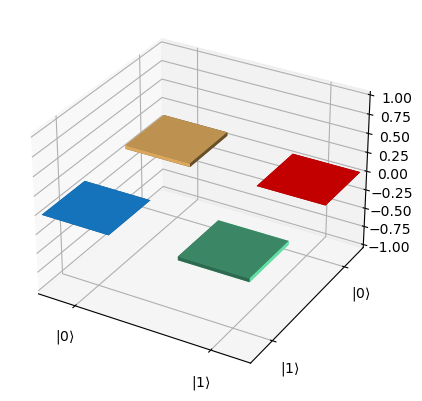

In [101]:
plot_rho1qb(rho.imag)